<a href="https://colab.research.google.com/github/rachelcynthia/Pests_Classification/blob/Pests_Classify_Algo/Pests_Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all necessary libraries

In [1]:
import pandas as pd
import PIL
from PIL import Image
from numpy import asarray
import numpy as np
from ast import literal_eval
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
from tensorflow import keras
from tensorflow.keras import layers
import datetime
import matplotlib.pyplot as plt

# Getting the pest data

In [2]:
Pests_info = pd.read_csv("/content/drive/MyDrive/Pests Dataset/Pests_info_dataset.csv")
Pests_info

,Name,Description,Pesticide_Or_Insecticide,Natural_Ingredient,Found_In
0,Aphid,Soft-bodied insects that can be green or grey ...,flonicamid 50 WG @ 4gImidacloprid 200 SL @ 2.5...,Add lady beetles or lacewigs or syrphid flies ...,Potato; Sugarcane; Papaya
1,Caterpillar,The larval stages of moths or butterflies. It ...,B.t Toxin @ 1.0 kg in 1125 litres of water per...,Removing plant weeds and debris; Destroy webbi...,Apple; Cherry; Plum; Aspen; Milkweed
2,Cutworm,Cutworms hide in the soil by day and attack pl...,carbaryl 50 WP @2.5 kg/ha; quinalphos 20 EC@2 ...,Remove weeds and stubles;,Asparagus; Beans; Cabbage; Corn; Lettuce; Pota...
3,Earhead Bug,A broad headed bug that feed on developing ric...,Malathion 50 EC 500 ml/ha; Neem seed kernel ex...,Avoid close planting and provide 30 cm rogue s...,Rice
4,Locust,Locusts consume leaves and the tender tissues ...,Dusting the crop with 5-10% methyl parathion 2...,Release ants or dogs in the plants,Corn; Oats; Peanuts
5,Mites,Mites have eight legs compared to insects (whi...,Systemic miticides; Spiromesifen at 72 g a.i/ha.,Plowing stubble after harvesting crops; Sampli...,Asparagus; Beetroot; Carrots; Parsnips; Peas; ...
6,Slaters,Slaters or woodlice are small crustaceans that...,None,Put some hollowed out orange halves; seedling ...,Melons; Strawberriies; Pot plants
7,Stem Borer,The stem borer larvae bore at the base of the ...,Flubendiamide 48 SC @ 2.5 ml; chlorantrinilipr...,At seedbed and transplanting handpick and dest...,Rice; Paddy
8,Thrips,Thrips are 1–2mm long torpedo-shaped insects t...,Treat seeds with imidacloprid 70% WS @ 12 g/kg...,Inter crop with pther crops that provide shade,Rice; Paddy
9,Weevil,At night the 10mm adults may attack stems and ...,Apply Neem cake @ 500 kg/ha at the time of las...,Collect and destroy adults,Asparagus; Beetroot; Carrots; Parsnips; Peas; ...


In [3]:
class_names = ["aphid","caterpillar","cutworm","earheadbug","leafhopper","locust","mites","slaters","stemborer","thrips","weevil","whitefly"]
images_array = []
labels_array = []
for i in range(len(class_names)):
  for j in range(15):
    img = Image.open(r'/content/drive/MyDrive/Pests Dataset/train/' + class_names[i] + '/' + str(j+1) + '.jpg')
    data = asarray(img)
    images_array.append(data)
    labels_array.append(i)

In [4]:
img_arr =[]
for i in range(len(images_array)):
  arr = np.array(images_array[i])
  l = arr.tolist()
  img_arr.append(l)

In [5]:
dataset = pd.DataFrame({'labels': labels_array, 'image': img_arr})
dataset.to_csv('training_set.csv')

# Getting the training data and modifying it

In [6]:
training_set = pd.read_csv("training_set.csv")
training_set

,Unnamed: 0,labels,image
0,0,0,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,1,0,"[[[179, 208, 188], [203, 232, 210], [196, 226,..."
2,2,0,"[[[140, 184, 148], [140, 184, 148], [140, 184,..."
3,3,0,"[[[143, 174, 55], [128, 159, 39], [135, 166, 4..."
4,4,0,"[[[245, 255, 216], [244, 255, 216], [249, 255,..."
...,...,...,...
175,175,11,"[[[67, 93, 46], [67, 93, 46], [68, 94, 47], [6..."
176,176,11,"[[[88, 104, 68], [88, 104, 68], [88, 104, 68],..."
177,177,11,"[[[91, 87, 50], [88, 84, 47], [83, 79, 42], [7..."
178,178,11,"[[[151, 162, 184], [150, 162, 184], [150, 162,..."


In [7]:
x = training_set['image']
x[:2]

0    [[[255, 255, 255], [255, 255, 255], [255, 255,...
1    [[[179, 208, 188], [203, 232, 210], [196, 226,...
Name: image, dtype: object

In [8]:
y = training_set['labels']
y[:2]

0    0
1    0
Name: labels, dtype: int64

Classify the insects as numbers from 1 to 12

In [9]:
Insect_Numbers = {'aphid':0,'caterpillar':1,'cutworm':2,'earheadbug':3,'leafhopper':4,'locust':5,'mites':6,'slaters':7,'stemborer':8,'thrips':9,'weevil':10,'whitefly':11}

In [10]:
y_train = np.array([i for i in y])
y_train.shape

(180,)

In [11]:
for i in range(len(x)):
  a = np.array(literal_eval(x[i]))
  a = a.astype(np.uint8)
  x[i] = a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
x = np.array([i for i in x])
x[2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


array([[[140, 184, 148],
        [140, 184, 148],
        [140, 184, 148],
        ...,
        [130, 185, 117],
        [132, 183, 117],
        [124, 172, 112]],

       [[132, 176, 140],
        [133, 177, 141],
        [135, 179, 143],
        ...,
        [125, 181, 108],
        [125, 176, 109],
        [114, 163,  98]],

       [[119, 163, 127],
        [122, 166, 130],
        [127, 171, 135],
        ...,
        [109, 166,  89],
        [108, 160,  86],
        [ 99, 149,  78]],

       ...,

       [[ 80, 113,  44],
        [ 80, 113,  44],
        [ 80, 113,  44],
        ...,
        [ 80, 128,  42],
        [ 80, 128,  42],
        [ 80, 128,  42]],

       [[ 82, 115,  46],
        [ 82, 115,  46],
        [ 82, 115,  46],
        ...,
        [ 79, 127,  41],
        [ 79, 127,  41],
        [ 79, 127,  41]],

       [[ 82, 115,  46],
        [ 82, 115,  46],
        [ 82, 115,  46],
        ...,
        [ 79, 127,  41],
        [ 79, 127,  41],
        [ 79, 127,  41]]

In [13]:
x_train=[]
for i in range(len(x)):
  im = Image.fromarray(x[i])
  im = im.resize((180,180))
  ar = np.asarray(im)
  #ar = ar.tolist()
  #ar1 = [y for y in ar]
  x_train.append(ar)
x_train = np.array(x_train)
x_train.shape

(180, 180, 180, 3)

Example of the data stored:

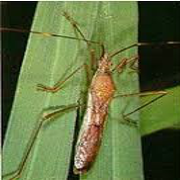

In [14]:
im = Image.fromarray(x_train[45])
im

# Getting the test data and modifying it

In [15]:
class_names = ["aphid","caterpillar","cutworm","earheadbug","leafhopper","locust","mites","slaters","stemborer","thrips","weevil","whitefly"]
images_array = []
labels_array = []
for i in range(len(class_names)):
  for j in range(5):
    img = Image.open(r'/content/drive/MyDrive/Pests Dataset/test/' + class_names[i] + '/' + str(j+1) + '.jpg')
    data = asarray(img)
    images_array.append(data)
    labels_array.append(i)

In [16]:
img_arr =[]
for i in range(len(images_array)):
  arr = np.array(images_array[i])
  l = arr.tolist()
  img_arr.append(l)

In [17]:
dataset = pd.DataFrame({'labels': labels_array, 'image': img_arr})
dataset.to_csv('test_set.csv')

In [18]:
test_set = pd.read_csv("test_set.csv")
test_set

,Unnamed: 0,labels,image
0,0,0,"[[[140, 184, 148], [140, 184, 148], [140, 184,..."
1,1,0,"[[[98, 141, 52], [98, 141, 52], [98, 141, 52],..."
2,2,0,"[[[170, 202, 127], [170, 202, 127], [170, 202,..."
3,3,0,"[[[62, 109, 54], [68, 115, 60], [63, 111, 53],..."
4,4,0,"[[[143, 174, 55], [128, 159, 39], [135, 166, 4..."
5,5,1,"[[[76, 124, 25], [78, 126, 27], [82, 128, 30],..."
6,6,1,"[[[81, 143, 18], [78, 138, 14], [84, 144, 22],..."
7,7,1,"[[[158, 207, 160], [160, 209, 162], [162, 209,..."
8,8,1,"[[[21, 38, 2], [21, 38, 2], [21, 38, 2], [21, ..."
9,9,1,"[[[78, 69, 60], [73, 66, 58], [67, 60, 52], [6..."


In [19]:
x_t = test_set['image']
x_t[:2]

0    [[[140, 184, 148], [140, 184, 148], [140, 184,...
1    [[[98, 141, 52], [98, 141, 52], [98, 141, 52],...
Name: image, dtype: object

In [20]:
y_test = test_set['labels']
y_test[:2]

0    0
1    0
Name: labels, dtype: int64

In [21]:
y_test = np.array([i for i in y_test])
y_test

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11])

In [22]:
for i in range(len(x_t)):
  a = np.array(literal_eval(x_t[i]))
  a = a.astype(np.uint8)
  x_t[i] = a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
x_test=[]
for i in range(len(x_t)):
  im = Image.fromarray(x_t[i])
  im = im.resize((180,180))
  ar = np.asarray(im)
  #ar = ar.tolist()
  #ar1 = [y for y in ar]
  x_test.append(ar)
x_test = np.array(x_test)
x_test.shape

(60, 180, 180, 3)

# The Model(Create, Fit, Evaluate)

In [24]:
def create_model():
  model=Sequential(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180,180,3)))
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(512,activation='relu'))
  model.add(Dense(13,activation='softmax'))
  return model

Compile the model

In [25]:
# Clear logs
!rm -rf ./logs/
model=create_model()
model.summary()
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
log_dir="logs/fit/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback= TensorBoard(log_dir=log_dir,histogram_freq=1)
earlystopping_callback = EarlyStopping(
    monitor='val_loss',min_delta=0,patience=3,verbose=0,mode='auto',
    baseline=None,restore_best_weights=True
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
flatten (Flatten)            (None, 97200)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               49766912  
_________________________________________________________________
dense_1 (Dense)              (None, 13)                6669      
Total params: 49,773,581
Trainable params: 49,773,581
Non-trainable params: 0
_________________________________________________________________


Fit the model

In [26]:
model.fit(x_train,y_train,epochs=20,validation_split=0.1,callbacks=[tensorboard_callback,earlystopping_callback])

Epoch 1/20
6/6 [==============================] - 3s 377ms/step - loss: 74.1816 - accuracy: 0.0898 - val_loss: 275.9053 - val_accuracy: 0.0000e+00
Epoch 2/20
6/6 [==============================] - 2s 283ms/step - loss: 134.4555 - accuracy: 0.0860 - val_loss: 262.8123 - val_accuracy: 0.0000e+00
Epoch 3/20
6/6 [==============================] - 2s 277ms/step - loss: 117.4315 - accuracy: 0.0568 - val_loss: 256.3721 - val_accuracy: 0.0000e+00
Epoch 4/20
6/6 [==============================] - 2s 281ms/step - loss: 101.0279 - accuracy: 0.0880 - val_loss: 182.9273 - val_accuracy: 0.0000e+00
Epoch 5/20
6/6 [==============================] - 2s 276ms/step - loss: 57.3646 - accuracy: 0.2111 - val_loss: 143.8747 - val_accuracy: 0.0000e+00
Epoch 6/20
6/6 [==============================] - 2s 281ms/step - loss: 36.0911 - accuracy: 0.2032 - val_loss: 109.9846 - val_accuracy: 0.0000e+00
Epoch 7/20
6/6 [==============================] - 2s 278ms/step - loss: 18.8334 - accuracy: 0.2676 - val_loss: 83.1

Evaluate the model

In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

2/2 [==============================] - 0s 86ms/step - loss: 5.8526 - accuracy: 0.4667


# Predictions with test set

In [28]:
predictions = model.predict(x_test)
predictions.shape

(60, 13)

In [34]:
class_names =['aphid','caterpillar','cutworm','earheadbug','leafhopper','locust','mites','slaters','stemborer','thrips','weevil','whitefly']

In [30]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
    true_flag=1
  else:
    color = 'red'
    true_flag=0

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  return true_flag

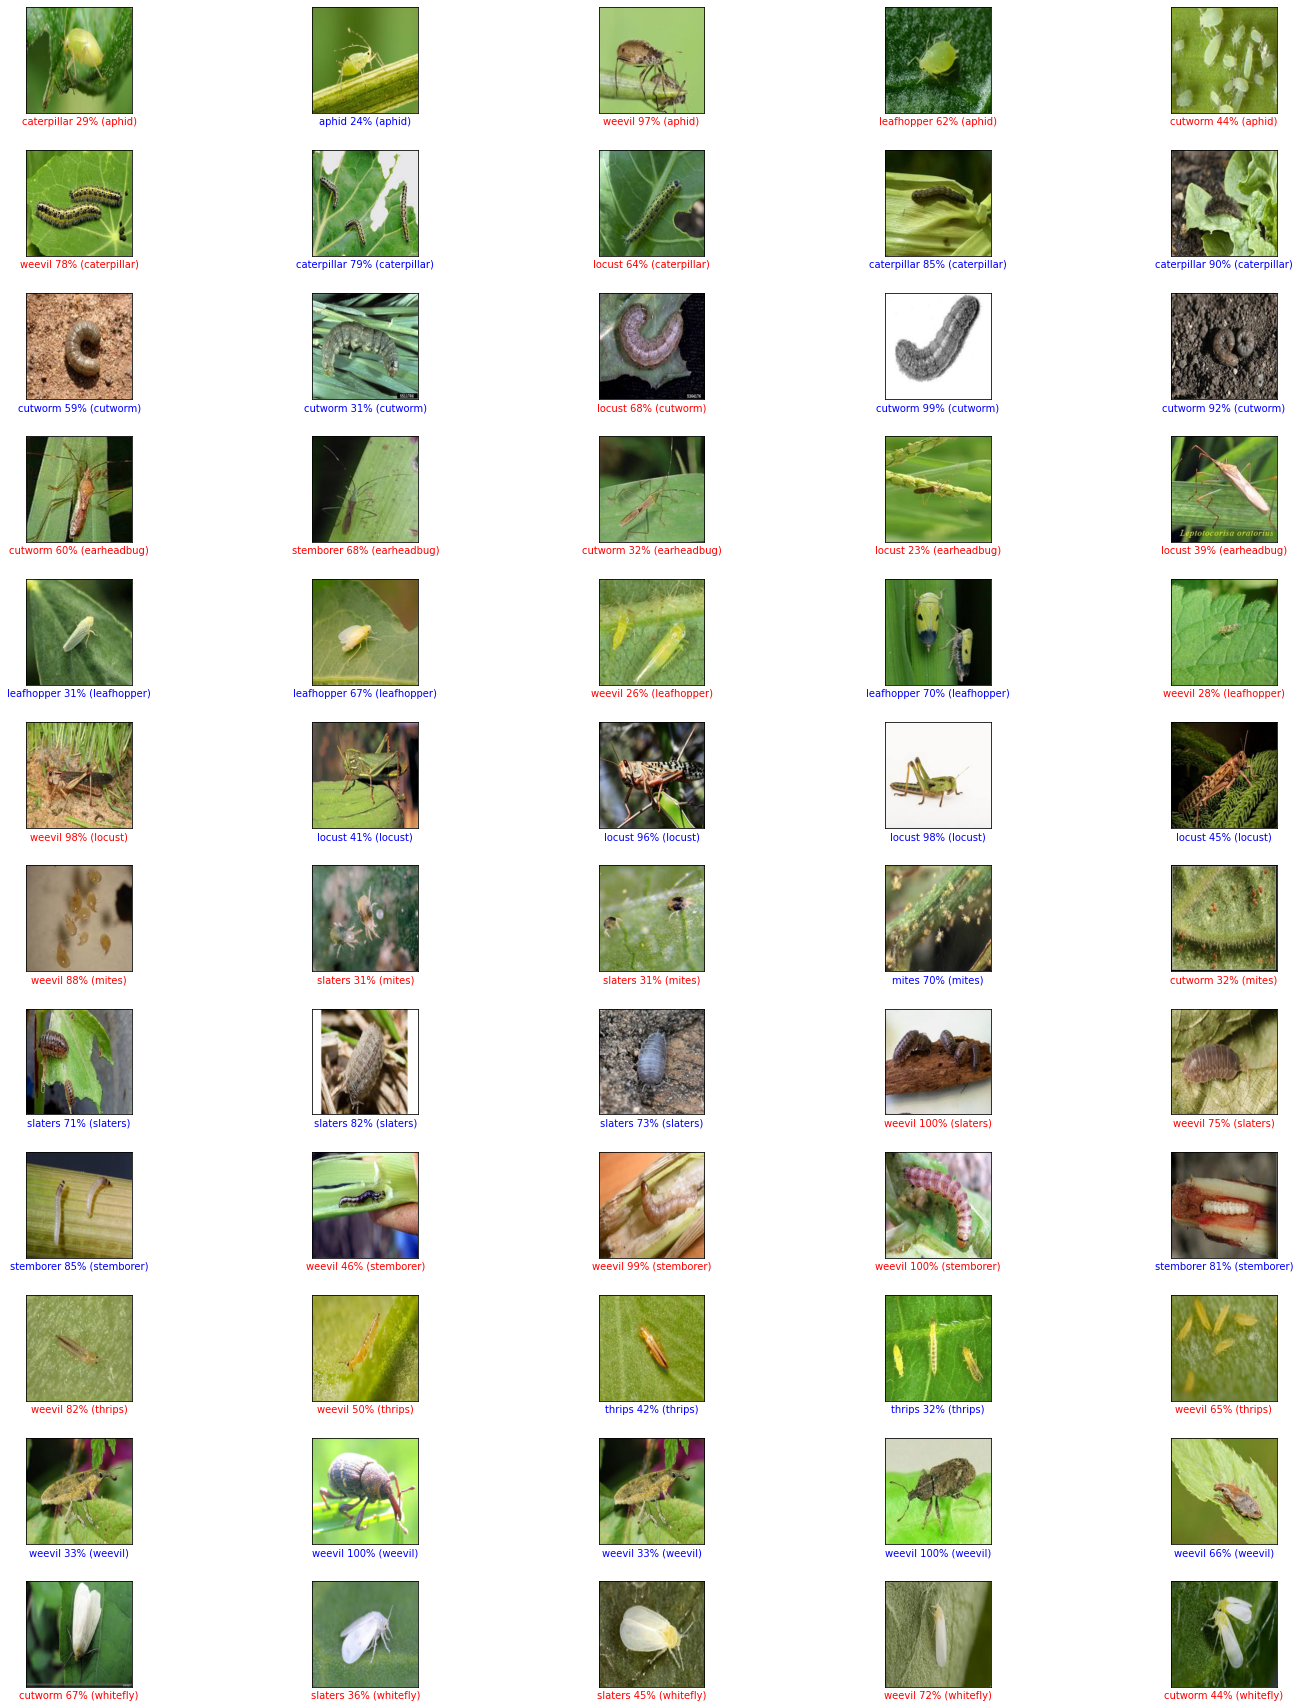

In [35]:
num_rows = 12
num_cols = 5
num_images = num_rows*num_cols
correct, wrong =0, 0
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  a=plot_image(i, predictions[i], y_test, x_test)
  if(a==1):
    correct+=1
  else:
    wrong+=1
plt.tight_layout()
plt.show()

In [36]:
correct/(correct+wrong)

0.4666666666666667

In [33]:
model.save("/content/drive/MyDrive/Pests_Model/rachel_sequential.h5")